In [1]:
# Experiment 2 - Down sample the given image
from skimage import io
import matplotlib.pyplot as plt

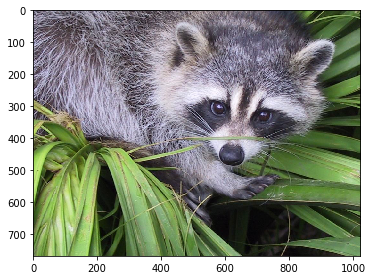

In [2]:
image = io.imread('face.png')
io.imshow(image)

Text(0.5, 1.0, 'Down Sampled Image')

<Figure size 432x288 with 0 Axes>

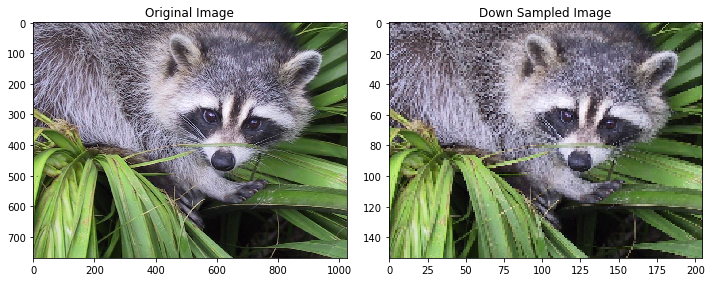

In [3]:
# Down sample the given image
image_down = image.copy()
sh = image_down.shape
ds = 5
rowd = int(sh[0]/ds)+1
cold = int(sh[1]/ds)+1
image_down = image_down[0:rowd,0:cold]
sh1 = image_down.shape
rw=0
cl=0

for r in range(0,sh[0],ds):
    cl = 0
    for c in range(0,sh[1],ds):
        image_down[rw][cl] = image[r][c]
        cl = cl+1
    rw = rw+1

plt.figure()
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
io.imshow(image)
plt.title('Original Image')

plt.subplot(1,2,2)
io.imshow(image_down)
plt.title('Down Sampled Image')

Text(0.5, 1.0, 'Up Sampled Image')

<Figure size 432x288 with 0 Axes>

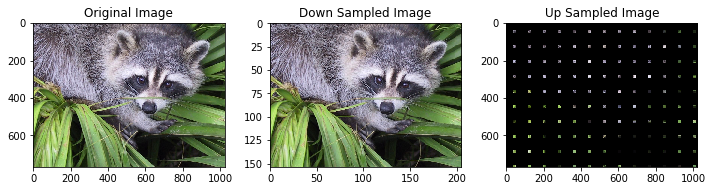

In [4]:
# Up Sample the given image

up = 5
image_up = image.copy()
sh = image_down.shape
r = 0
c = 0

# Insert 0 in additional rows and columns

for row in range(0,sh[0]):
    c=0
    for col in range(0,sh[1]):
        image_up[r][c] = image_down[row][col]
        image_up[r,c+1:c+up] = 0
        c = c+up
    image_up[r+1:r+up,:] = 0
    r = r+up
    
plt.figure()
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
io.imshow(image)
plt.title('Original Image')

plt.subplot(1,3,2)
io.imshow(image_down)
plt.title('Down Sampled Image')

plt.subplot(1,3,3)
io.imshow(image_up)
plt.title('Up Sampled Image')

Text(0.5, 1.0, 'Up Sampled Image')

<Figure size 432x288 with 0 Axes>

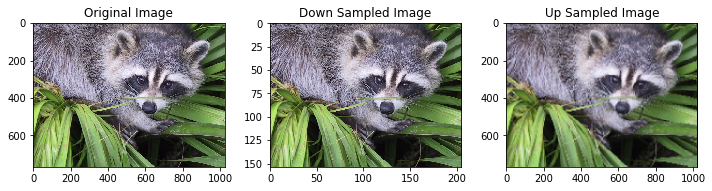

In [5]:
sh = image_up.shape

# use average method of interpolation
# For column
for row in range(0,sh[0],up):
    for col in range(0,sh[1]-up,up):
        temp1 = image_up[row,col]/2
        temp2 = image_up[row,col+up]/2
        temp = temp1 + temp2
        image_up[row,col+1:col+up] = [int(temp[0]),int(temp[1]),int(temp[2])]

# For row
for col in range(0,sh[1]):
    for row in range(0,sh[0]-up,up):
        temp1 = image_up[row,col]/2
        temp2 = image_up[row+up,col]/2
        temp = temp1 + temp2
        image_up[row:row+up,col] = [int(temp[0]),int(temp[1]),int(temp[2])]
        
plt.figure()
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
io.imshow(image)
plt.title('Original Image')

plt.subplot(1,3,2)
io.imshow(image_down)
plt.title('Down Sampled Image')

plt.subplot(1,3,3)
io.imshow(image_up)
plt.title('Up Sampled Image')